# Clasificador con regresión logística y mapa de la veta

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

from sklearn import model_selection
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler    

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import statsmodels.api as sm # para regresión logística con statsmodels


In [2]:
 sklearn.__version__,  sm.__version__

('0.23.2', '0.10.0')

In [3]:
data=pd.read_csv("/home/pi1grupo4/bmv100clean.csv")
data.head()

,XC,YC,ZC,NSAMP,NHOLES,PASS,DISTNEAR,ESTVAR,BE,CLASS_QP
0,128720.5,232510.10,3005.5,8.0,2.0,3.0,50.242311,0.394184,0.013384,2
1,128720.5,232510.15,3006.5,8.0,2.0,3.0,50.504265,0.396241,0.013369,2
2,128720.5,232510.25,3007.5,8.0,2.0,5.0,50.754825,204.990842,11.528859,2
3,128720.5,232510.25,3008.5,8.0,2.0,3.0,51.083045,0.399827,0.013313,2
4,128719.5,232510.00,3018.5,8.0,2.0,5.0,56.077945,204.990842,11.286284,2


In [4]:
data= data.drop(columns=['NHOLES'],axis=1) # Extrayendo NHoles


In [5]:
X = data.iloc[:,:-1]
Y = data.iloc[:, 8]

In [6]:
print(len(X),len(Y))

1196098 1196098


In [7]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=123) 

### Multitest

In [8]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train, test_size=0.2,random_state=123) 

### Set in values

In [9]:
X_train1Values=(X_train1.iloc[:,3:8]).values
X_test1Values=(X_test1.iloc[:,3:8]).values
y_train1Values=y_train1.values
y_test1Values=y_test1.values

In [10]:
scaler = StandardScaler()
scaler.fit(X_train1Values)
#Scale Data
X_trainScaled = scaler.transform(X_train1Values)
X_testScaled = scaler.transform(X_test1Values)

In [15]:
lm = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg',penalty='l2',class_weight='balanced')
lm.fit(X_trainScaled,y_train1Values)

LogisticRegression(class_weight='balanced', multi_class='multinomial',
                   solver='newton-cg')

### Prediction

In [16]:
y_pred1=lm.predict(X_testScaled)

### Accuracy

In [17]:
print('Accuracy Score:', metrics.accuracy_score(y_test1Values, y_pred1))  

Accuracy Score: 0.8690326895744503


In [18]:
print(confusion_matrix(y_test1, y_pred1))
print(classification_report(y_test1, y_pred1,digits=5))

[[37626  3293     0]
 [ 5320 55378  6935]
 [  126  6257 52519]]
              precision    recall  f1-score   support

           1    0.87356   0.91952   0.89595     40919
           2    0.85291   0.81880   0.83551     67633
           3    0.88336   0.89163   0.88748     58902

    accuracy                        0.86903    167454
   macro avg    0.86994   0.87665   0.87298    167454
weighted avg    0.86867   0.86903   0.86856    167454



In [84]:
list1 = y_pred1.tolist()

In [85]:
X_test1['Prediction_Logit']=list1

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [86]:
X_test1.head()

,XC,YC,ZC,NSAMP,PASS,DISTNEAR,ESTVAR,BE,Prediction_Logit
833256,129345.5,233084.35,3594.5,9.0,2.0,7.530801,0.155400,0.031771,1
1041358,129457.5,233226.95,2177.5,2.0,5.0,121.582356,1.347252,0.612710,3
502439,129157.5,233016.30,3082.5,10.0,3.0,13.230610,0.133785,0.003770,2
136745,128950.5,232775.25,3640.5,8.0,5.0,129.815152,4.560316,2.647266,3
425487,129111.5,232964.30,3195.5,12.0,1.0,5.857695,0.134779,0.005443,1


### Dibujar la veta


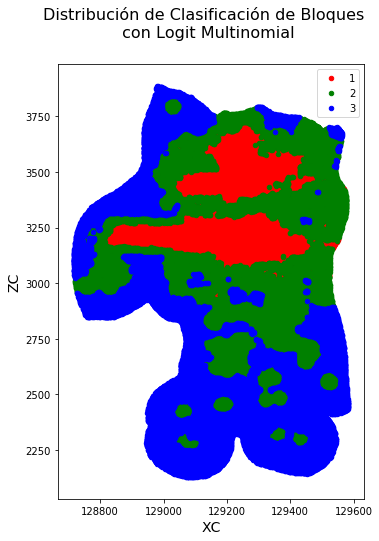

In [87]:
# Visualización de la Beta de la clasificación del Logit
#====================================================================================

fig, ax = plt.subplots(figsize = (5.5, 8))
colors = {1:'red', 2:'green', 3:'blue'}
grouped = X_test1.groupby('Prediction_Logit')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='XC', y='ZC', label=key, color=colors[key])
plt.suptitle("Distribución de Clasificación de Bloques \n con Logit Multinomial", fontsize=16)
plt.xlabel('XC', fontsize=14)
plt.ylabel('ZC', fontsize=14)
plt.show()

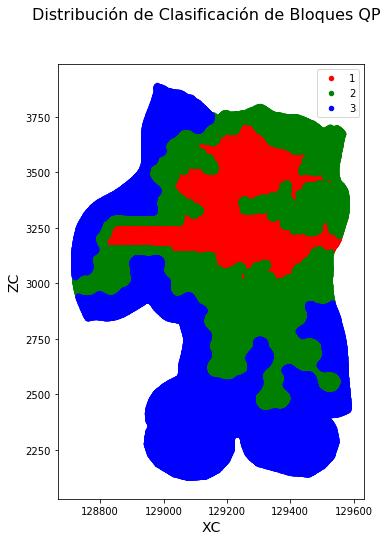

In [64]:
# Visualización de la veta de la clasificación del QP (Veta de referencia)
#====================================================================================

fig, ax = plt.subplots(figsize = (5.5, 8))
colors = {1:'red', 2:'green', 3:'blue'}
grouped = data.groupby('CLASS_QP')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='XC', y='ZC', label=key, color=colors[key])
plt.suptitle("Distribución de Clasificación de Bloques QP", fontsize=16)
plt.xlabel('XC', fontsize=14)
plt.ylabel('ZC', fontsize=14)
plt.show()